In [1]:
import pandas as pd
file_path= r".\specs\marks_question1.csv"
df = pd.read_csv(file_path)
df

,midterm,final
0,72,84
1,50,63
2,81,77
3,74,78
4,94,90
5,86,75
6,59,49
7,83,79
8,65,77
9,33,52


In [2]:
import matplotlib.pyplot as plt

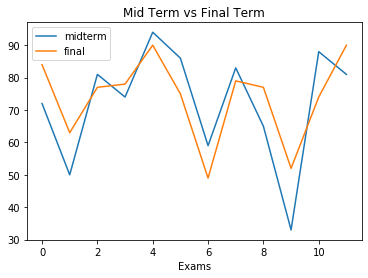

In [3]:
plt.plot(df)
plt.title('Mid Term vs Final Term')
plt.xlabel('Exams')
plt.legend(df)
plt.savefig('.\output\marks.png')
plt.show()

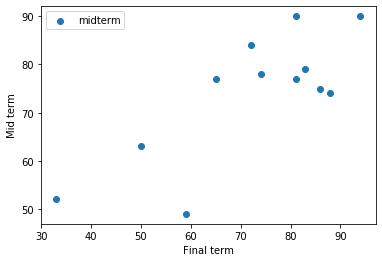

In [4]:
plt.scatter(df['midterm'],df['final'])
plt.xlabel('Final term')
plt.ylabel('Mid term')
plt.legend(df)
plt.show()

In [5]:
from sklearn import linear_model 

In [6]:
X= df['midterm'].values.reshape(-1,1)
Y = df['final'].values.reshape(-1,1)

In [7]:
lin_reg =linear_model.LinearRegression()

In [8]:
X

array([[72],
       [50],
       [81],
       [74],
       [94],
       [86],
       [59],
       [83],
       [65],
       [33],
       [88],
       [81]], dtype=int64)

In [9]:
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print('\na= ',lin_reg.intercept_)
print('\nb= ',lin_reg.coef_)


a=  [32.02786108]

b=  [[0.58160008]]


In [11]:
y_pred = lin_reg.predict(X)

In [12]:
y_pred = [y[0] for y in y_pred]
y_pred

[73.90306665376801,
 61.10786495114637,
 79.13746735029505,
 75.0662668085518,
 86.69826835638966,
 82.04546773725451,
 66.3422656476734,
 80.30066750507885,
 69.83186611202476,
 51.220663635484186,
 83.2086678920383,
 79.13746735029505]

In [13]:
y_actual = [y[0] for y in Y]
y_actual

[84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90]

In [14]:
dic = {'Final Actual': y_actual, 'Final Predicted': y_pred}
actualVsPrediceted = pd.DataFrame(dic)
actualVsPrediceted

,Final Actual,Final Predicted
0,84,73.903067
1,63,61.107865
2,77,79.137467
3,78,75.066267
4,90,86.698268
5,75,82.045468
6,49,66.342266
7,79,80.300668
8,77,69.831866
9,52,51.220664


In [15]:
print('Total Loss:',lin_reg.score(pd.DataFrame(y_actual),pd.DataFrame(y_pred)) )

Total Loss: 0.599496952694205


## Q2

In [16]:
import pandas as pd
dct_filePath=r".\specs\borrower_question2.csv"

In [45]:
dct_df= pd.read_csv(dct_filePath)
dct_df

,TID,HomeOwner,MaritalStatus,AnnualIncome,DefaultedBorrower
0,1,Yes,Single,125,No
1,2,No,Married,100,No
2,3,No,Single,70,No
3,4,Yes,Married,120,No
4,5,No,Divorced,120,Yes
5,6,No,Married,60,No
6,7,Yes,Divorced,220,No
7,8,No,Single,85,Yes
8,9,No,Married,75,No
9,10,No,Single,90,Yes


In [46]:
dct_df= dct_df.drop(['TID'], axis=1)
dct_df

,HomeOwner,MaritalStatus,AnnualIncome,DefaultedBorrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,120,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [48]:
dct_df.columns

Index(['HomeOwner', 'MaritalStatus', 'AnnualIncome', 'DefaultedBorrower'], dtype='object')

In [49]:
Y= dct_df['DefaultedBorrower']
X=dct_df[['HomeOwner', 'MaritalStatus', 'AnnualIncome']]

In [50]:
le = LabelEncoder()

In [51]:
Y=le.fit_transform(Y)

In [52]:
X_enc = pd.get_dummies(X)

In [53]:
X_enc

,AnnualIncome,HomeOwner_No,HomeOwner_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,125,0,1,0,0,1
1,100,1,0,0,1,0
2,70,1,0,0,0,1
3,120,0,1,0,1,0
4,120,1,0,1,0,0
5,60,1,0,0,1,0
6,220,0,1,1,0,0
7,85,1,0,0,0,1
8,75,1,0,0,1,0
9,90,1,0,0,0,1


In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X_enc,Y,test_size=0.2, random_state=4)

In [55]:
X_train

,AnnualIncome,HomeOwner_No,HomeOwner_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
4,120,1,0,1,0,0
9,90,1,0,0,0,1
2,70,1,0,0,0,1
6,220,0,1,1,0,0
0,125,0,1,0,0,1
1,100,1,0,0,1,0
5,60,1,0,0,1,0
7,85,1,0,0,0,1


In [57]:
Y_train

array([1, 1, 0, 0, 0, 0, 0, 1])

In [100]:
dct_cls = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=0.1)

In [101]:
dct_cls.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
from sklearn.tree import export_graphviz
from sklearn import metrics

In [103]:
y_pred= dct_cls.predict(X_test)

In [104]:
y_pred

array([0, 0])

In [105]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 1.0


In [106]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()

In [107]:
export_graphviz(dct_cls, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

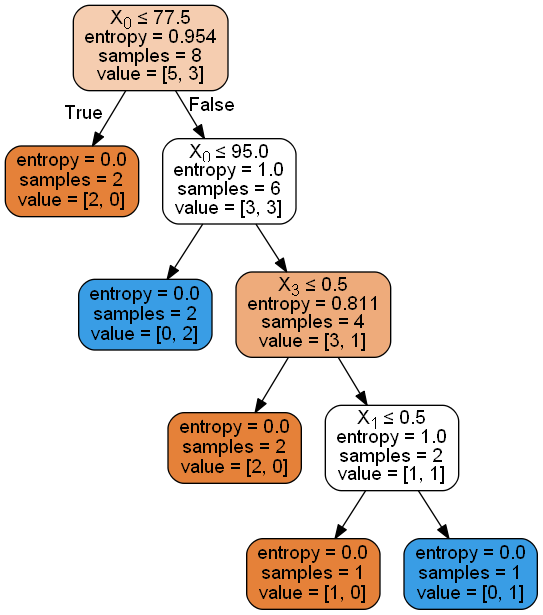

In [108]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [109]:
dct_cls = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=0.5)

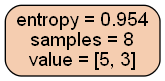

In [110]:
dot_data = StringIO()
dct_cls.fit(X_train,Y_train)
export_graphviz(dct_cls, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree2.png')
Image(graph.create_png())